# Machine Learning

### Laura Isabella Forero Camacho
### Liliia Aliakberova




# Part 1 Preprocess
* * *

In [1]:
# Uncomment to upgrade packages
!pip3 install pandas --user --upgrade --quiet
!pip3 install numpy --user --upgrade --quiet
!pip3 install scipy --user --upgrade --quiet
!pip3 install statsmodels --user --upgrade --quiet
!pip3 install seaborn --user --upgrade --quiet


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# extra imports
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox

### Loading the datasets

Create a list of all files and add the corresponding city names and day type

In [3]:
data = [("/Users/lauraforerocamacho/Downloads/data/amsterdam_weekdays.csv", "Amsterdam", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/athens_weekdays.csv", "Athens","Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/barcelona_weekdays.csv", "Barcelona", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/berlin_weekdays.csv", "Berlin", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/budapest_weekdays.csv", "Budapest", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/lisbon_weekdays.csv", "Lisbon", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/London_weekdays.csv", "London", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/rome_weekdays.csv", "Rome", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/paris_weekdays.csv", "Paris", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/Vienna_weekdays.csv", "Vienna", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/amsterdam_weekends.csv", "Amsterdam", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/athens_weekends.csv", "Athens", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/barcelona_weekends.csv", "Barcelona", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/berlin_weekends.csv", "Berlin", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/budapest_weekends.csv", "Budapest", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/lisbon_weekends.csv", "Lisbon", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/London_weekends.csv", "London", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/rome_weekends.csv", "Rome", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/paris_weekends.csv", "Paris", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/Vienna_weekends.csv", "Vienna", "Weekends")]


Merg data from all csv into one data frame 

In [4]:
dfs = []
for file_path, city_name, day_type in data:
    df = pd.read_csv(file_path, usecols=lambda col: col != 'Unnamed: 0')
    df = df.assign(city=city_name, type=day_type)
    dfs.append(df)
data = pd.concat(dfs)

The length and number of columns of the formed dataset

In [5]:
data.shape

(51707, 21)

### Basic Inspection of the dataset

Get descriptive information about the dataset

In [6]:
numeric_colums= ["realSum", "person_capacity","cleanliness_rating","guest_satisfaction_overall",'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat']
categorical_colums= ["room_type","room_shared", "room_private", "host_is_superhost","multi", "biz" , 'city', 'type']

In [7]:
len(numeric_colums)

13

In [8]:
len(categorical_colums)

8

In [9]:
# Describe to Numeric Values
data[numeric_colums].describe()

,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450280,6.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [10]:
# Describe to Categorical Values
data[categorical_colums].astype('object').describe()


,room_type,room_shared,room_private,host_is_superhost,multi,biz,city,type
count,51707,51707,51707,51707,51707,51707,51707,51707
unique,3,2,2,2,2,2,10,2
top,Entire home/apt,False,False,False,0,0,London,Weekends
freq,32648,51341,33014,38475,36642,33599,9993,26207


A shorter summary of the dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51707 entries, 0 to 1798
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  51707 non

In [12]:
data.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450280,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


### Dealing with missing values

Find the duplicates 

In [13]:
data.duplicated().sum()

0

Find null values

In [14]:
data.isnull().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
type                          0
dtype: int64

### TREATMENT OF MIXED DATA TYPES

There are some values that were loaded as numeric are actually categorical variables, now they are coded to have a more accurate representation of the business case.

In [15]:
numeric_colums

['realSum',
 'person_capacity',
 'cleanliness_rating',
 'guest_satisfaction_overall',
 'bedrooms',
 'dist',
 'metro_dist',
 'attr_index',
 'attr_index_norm',
 'rest_index',
 'rest_index_norm',
 'lng',
 'lat']

In [16]:
categorical_colums

['room_type',
 'room_shared',
 'room_private',
 'host_is_superhost',
 'multi',
 'biz',
 'city',
 'type']

In [17]:
for i in categorical_colums:
    data[i] = data[i].astype('object')
    data[i].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

array([False, True], dtype=object)

array([True, False], dtype=object)

array([False, True], dtype=object)

array([1, 0], dtype=object)

array([0, 1], dtype=object)

array(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon',
       'London', 'Rome', 'Paris', 'Vienna'], dtype=object)

array(['Weekdays', 'Weekends'], dtype=object)

View distributin of the value

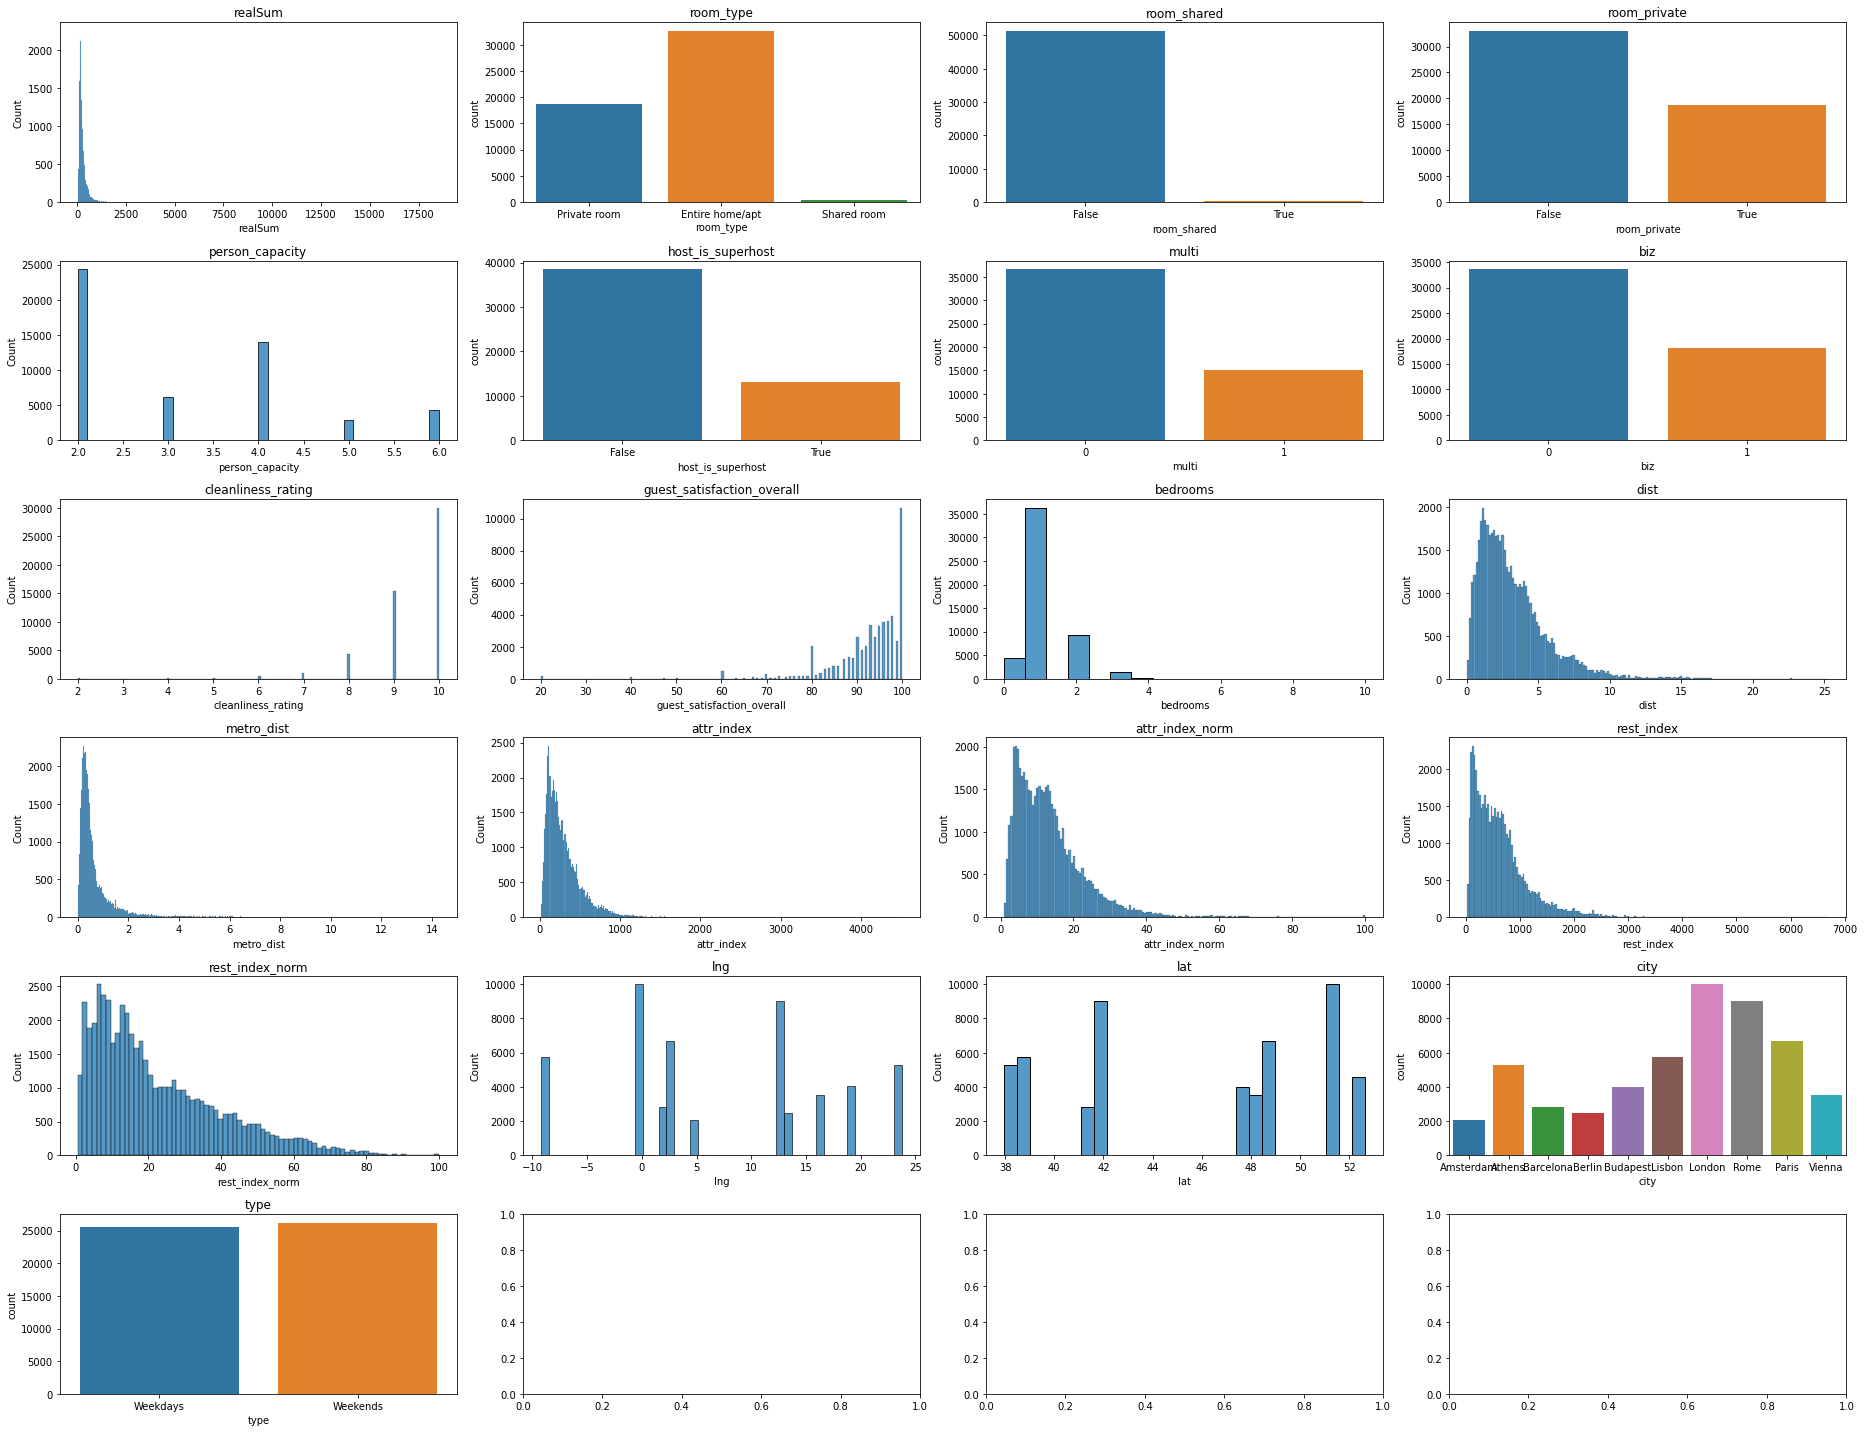

In [18]:
import seaborn as sns


fig, axes = plt.subplots(6,4,figsize=(26,20))

# We will not plot country because it has too many categories.
for i, c in enumerate(data.columns):
    ax = axes.reshape(-1)[i]
    if data[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=data,ax=ax)
    else:
        b = sns.histplot(x=c,data=data,ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

### FINDING OUTLIERS

<AxesSubplot:>

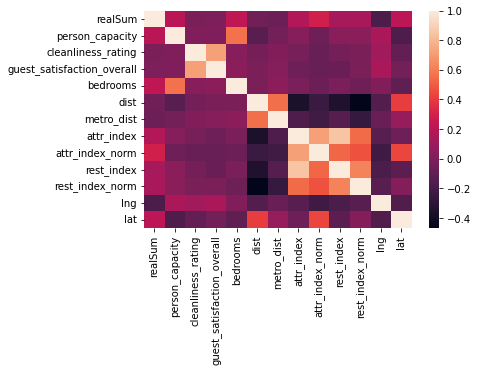

In [19]:
sns.heatmap(data.corr(numeric_only=True))
plt.show()

<AxesSubplot:>

array([<AxesSubplot:title={'center':'realSum'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'person_capacity'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'cleanliness_rating'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'guest_satisfaction_overall'}>],
      dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'bedrooms'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'dist'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'metro_dist'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'attr_index'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'attr_index_norm'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'rest_index'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'rest_index_norm'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'lng'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'lat'}>], dtype=object)

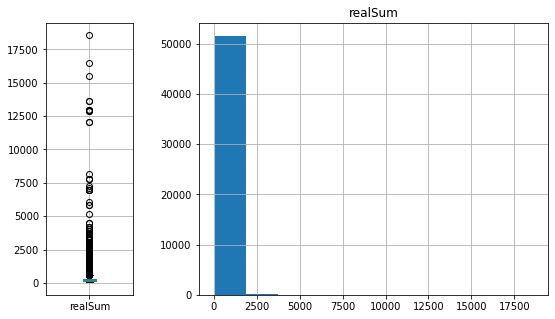

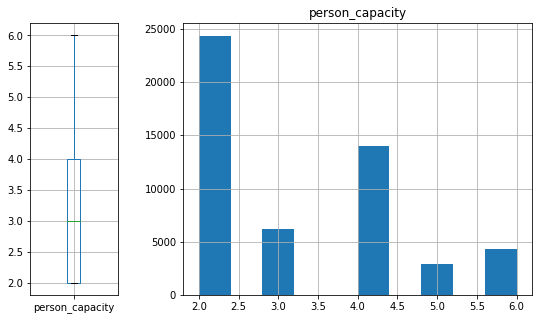

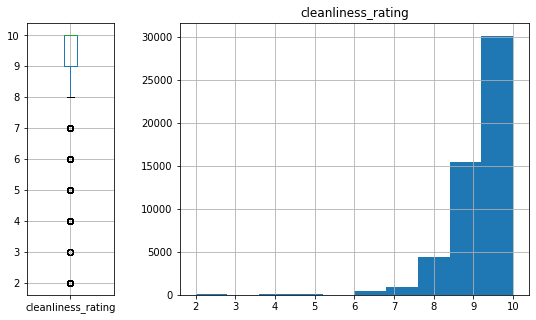

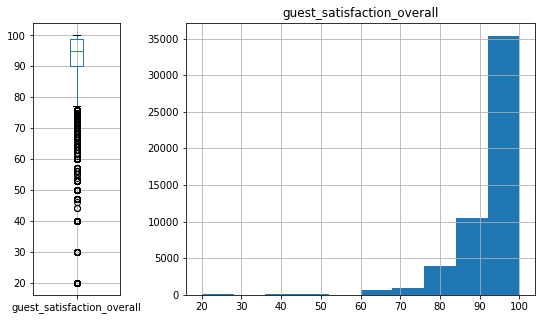

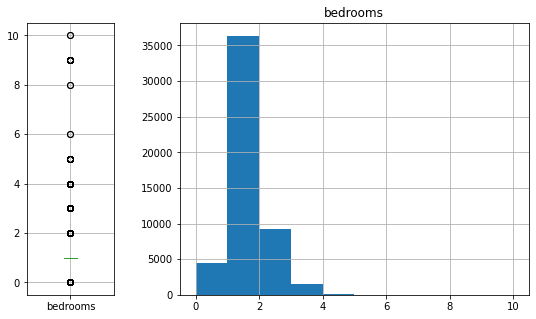

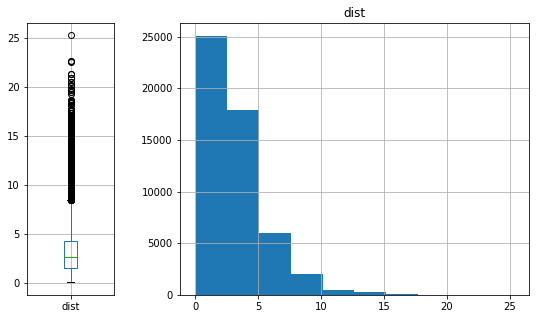

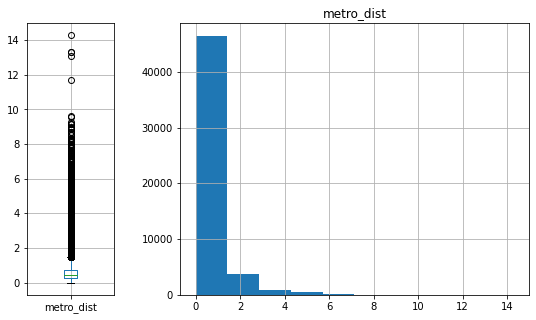

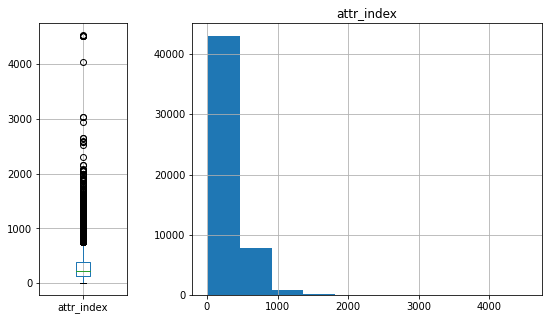

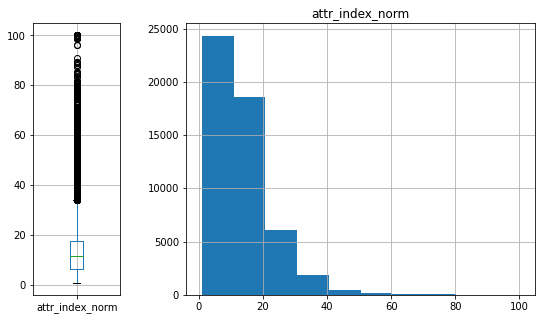

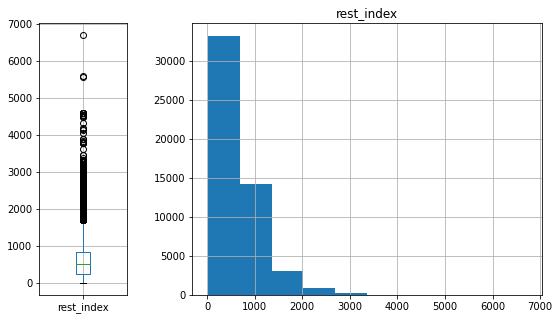

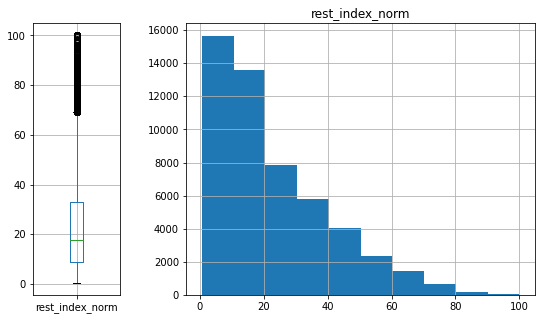

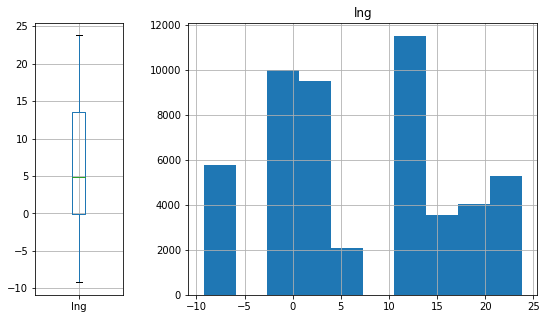

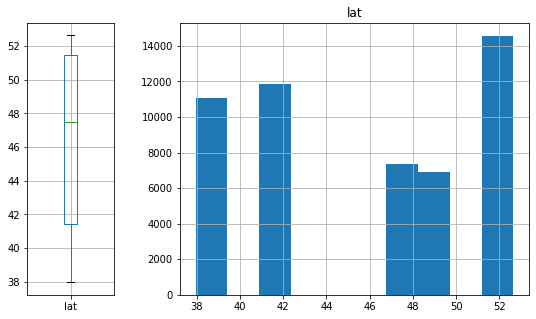

In [20]:
for i in numeric_colums:
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
    data.boxplot(column=i,ax=axes[0])
    data.hist(column=i, ax=axes[1])

Latitude and longitude are values that can bring noise to the model.

In [21]:
data_clean=data
data_clean=data_clean.drop(["lat","lng"], axis=1)

### Resampling protocol


In [22]:
X = data_clean.loc[:,data_clean.columns != 'realSum']
y = data_clean['realSum']

In [23]:
from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.api as sm
from scipy import stats


In [24]:
numerical_colums=[
 'person_capacity',
 'cleanliness_rating',
 'guest_satisfaction_overall',
 'bedrooms',
 'dist',
 'metro_dist',
 'attr_index',
 'attr_index_norm',
 'rest_index',
 'rest_index_norm']

In [25]:
for i in ["room_shared",	"room_private",	"host_is_superhost"]:
    X[i].replace([False, True],[0,1],inplace=True)

/var/folders/zv/hzjbp8kd1l103x8tgl0s00z80000gn/T/ipykernel_759/2627953380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i].replace([False, True],[0,1],inplace=True)


In [26]:
for column in ["room_type", "city", "type"]:
    X_one_hot = pd.get_dummies(X[column] , dtype=int,drop_first=True)
    X = pd.concat([X, X_one_hot], axis='columns')
 
# drop the values
X= X.drop(["room_type", "city", "type"], axis='columns')

In [27]:
X.head()

,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,...,Athens,Barcelona,Berlin,Budapest,Lisbon,London,Paris,Rome,Vienna,Weekends
0,0,1,2.0,0,1,0,10.0,93.0,1,5.022964,...,0,0,0,0,0,0,0,0,0,0
1,0,1,4.0,0,0,0,8.0,85.0,1,0.488389,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,0,0,1,9.0,87.0,1,5.748312,...,0,0,0,0,0,0,0,0,0,0
3,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,...,0,0,0,0,0,0,0,0,0,0
4,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,...,0,0,0,0,0,0,0,0,0,0


In [28]:
def categorical_preprocessing(X, y,scaler=None):
    print('Original shape:{}'.format(X.shape))
    # Scale numerical variables
    if scaler is None: 
        # We only want the scaler to fit the train data
        scaler = MinMaxScaler()
        X[numerical_colums] = scaler.fit_transform(X[numerical_colums])
    #else: 
        X[numerical_colums] = scaler.transform(X[numerical_colums])
    
    # Apply one hot encoding to categorical variables
    print('New shape:{}'.format(X.shape))
    return X, y, scaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, y_train, scaler = categorical_preprocessing(X_train,y_train)
X_test, y_test, _ = categorical_preprocessing(X_test,y_test,scaler)

Original shape:(34643, 27)
New shape:(34643, 27)
Original shape:(17064, 27)
New shape:(17064, 27)


In [29]:
lr_one_hot = LinearRegression()
lr_one_hot.fit(X_train,y_train)

r2_lr_one_hot_train = lr_one_hot.score(X_train,y_train)
r2_lr_one_hot_cv = np.mean(cross_val_score(lr_one_hot, X_train,y_train, cv=10, scoring='r2'))

print('Train R2 score: {}\nCross-Validation R2 score: {}'.format(r2_lr_one_hot_train, r2_lr_one_hot_cv))

LinearRegression()

Train R2 score: 0.22296758046801468
Cross-Validation R2 score: 0.24660451803090594


<Figure size 1440x72 with 0 Axes>

<AxesSubplot:>

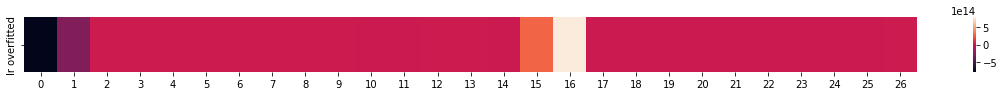

In [30]:
plt.figure(figsize = (20,1))
sns.heatmap(pd.DataFrame({'lr overfitted':lr_one_hot.coef_}).T)

In [31]:
lambdas = [1e-10,1e-5,1e-4,1e-3,1e-2,0.1, 0.5,1,5,10,50,100]

/Users/lauraforerocamacho/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.61286e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/lauraforerocamacho/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.61537e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/lauraforerocamacho/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.58604e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/lauraforerocamacho/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.62809e-19): result may not be accurate.
  return linalg.solve(A, Xy, assu

RidgeCV(alphas=[1e-10, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
        cv=5)

/Users/lauraforerocamacho/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.53264e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/lauraforerocamacho/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.53505e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/lauraforerocamacho/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.49819e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/lauraforerocamacho/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.58043e-19): result may not be accurate.
  return linalg.solve(A, Xy, assu

LassoCV(alphas=[1e-10, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
        cv=5)

/Users/lauraforerocamacho/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+09, tolerance: 3.012e+05
  model = cd_fast.enet_coordinate_descent(
/Users/lauraforerocamacho/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.332e+09, tolerance: 3.511e+05
  model = cd_fast.enet_coordinate_descent(
/Users/lauraforerocamacho/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

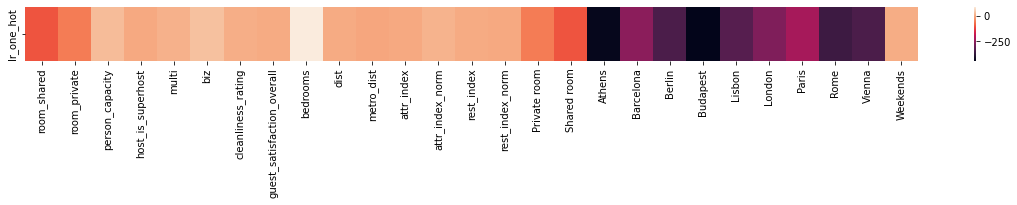

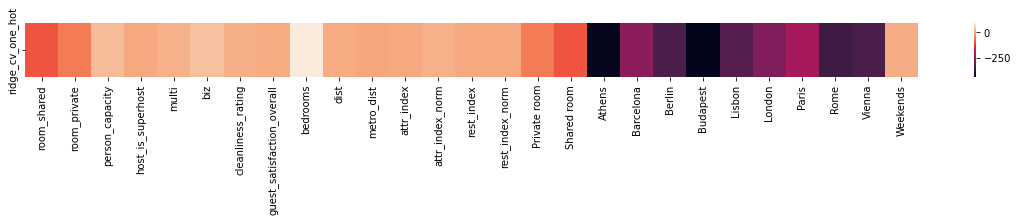

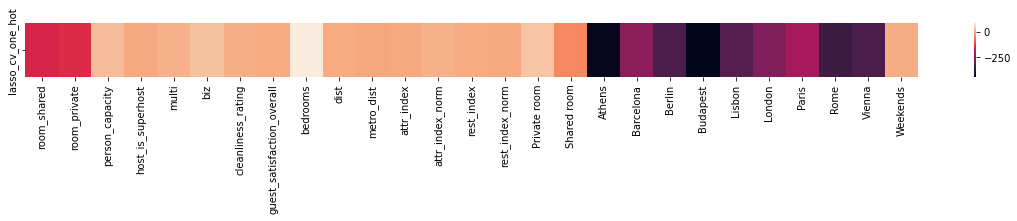

In [94]:
ridge_cv_one_hot = RidgeCV(alphas=lambdas, cv=5)
ridge_cv_one_hot.fit(X_train, y_train)

r2_ridge_one_hot_train = ridge_cv_one_hot.score(X_train,y_train)
r2_ridge_one_hot_cv = np.mean(cross_val_score(ridge_cv_one_hot, X_train, y_train, cv=5, scoring='r2'))

lasso_cv_one_hot = LassoCV(alphas=lambdas, cv=5)
lasso_cv_one_hot.fit(X_train, y_train)

r2_lasso_one_hot_train = ridge_cv_one_hot.score(X_train,y_train)
r2_lasso_one_hot_cv = np.mean(cross_val_score(lasso_cv_one_hot, X_train, y_train, cv=5, scoring='r2'))

weights = pd.DataFrame(
    {
        'lr_one_hot': lr_one_hot.coef_,
        'ridge_cv_one_hot': ridge_cv_one_hot.coef_,
        'lasso_cv_one_hot': lasso_cv_one_hot.coef_
    },
    index=X_train.columns)

for column in weights.columns:
    fig= plt.figure(figsize=(20,1))
    ax=sns.heatmap(weights[[column]].T)

In [95]:
r2_results=pd.DataFrame()
r2_results.loc[:, 'lr_one_hot'] =[r2_lr_one_hot_cv, r2_lr_one_hot_train, 0]
r2_results.loc[:, 'ridge_cv_one_hot'] =[r2_ridge_one_hot_cv, r2_ridge_one_hot_train, ridge_cv_one_hot.alpha_]
r2_results.loc[:, 'lasso_cv_one_hot'] =[r2_lasso_one_hot_cv, r2_lasso_one_hot_train, lasso_cv_one_hot.alpha_]
r2_results

,lr_one_hot,ridge_cv_one_hot,lasso_cv_one_hot
0,0.231983,0.231991,0.231994
1,0.222976,0.222975,0.222975
2,0.000000,0.500000,0.001000


In [96]:
y_tes_predicted = ridge_cv_one_hot.predict(X_test)
r2_ridge = ridge_cv_one_hot.score(X_test,y_test)

print('Mean sqared error with test data: {}'.format(mean_squared_error(y_test,y_tes_predicted)))
print('R2 score with test data: {}'.format(r2_ridge))

Mean sqared error with test data: 60217.91116444397
R2 score with test data: 0.2975456477811793


In [32]:
len(X.columns)

27

<AxesSubplot:>

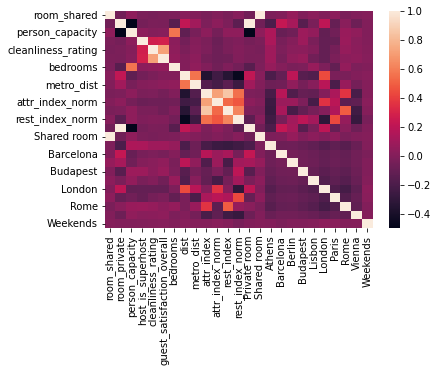

In [33]:
sns.heatmap(X.corr(numeric_only=True))
plt.show()

In [34]:
X.columns

Index(['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
       'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
       'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm',
       'rest_index', 'rest_index_norm', 'Private room', 'Shared room',
       'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon', 'London',
       'Paris', 'Rome', 'Vienna', 'Weekends'],
      dtype='object')

In [109]:
new_columns=['person_capacity', 'host_is_superhost',
       'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
       'bedrooms', 'dist', 'attr_index','rest_index', 'Private room', 'Shared room',
       'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon', 'London',
       'Paris', 'Rome', 'Vienna', 'Weekends']
X_new= X[new_columns]

In [90]:
X_new.tail(5)

,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,attr_index,Private room,...,Athens,Barcelona,Berlin,Budapest,Lisbon,London,Paris,Rome,Vienna,Weekends
1794,6.0,0,0,1,10.0,100.0,3,0.530181,219.402478,0,...,0,0,0,0,0,0,0,0,1,1
1795,2.0,0,0,0,8.0,86.0,1,0.810205,204.970121,0,...,0,0,0,0,0,0,0,0,1,1
1796,2.0,0,0,0,10.0,93.0,1,0.994051,169.073402,0,...,0,0,0,0,0,0,0,0,1,1
1797,2.0,0,0,0,10.0,87.0,1,3.044100,109.236574,1,...,0,0,0,0,0,0,0,0,1,1
1798,4.0,1,1,0,10.0,93.0,1,1.263932,150.450381,1,...,0,0,0,0,0,0,0,0,1,1


<AxesSubplot:>

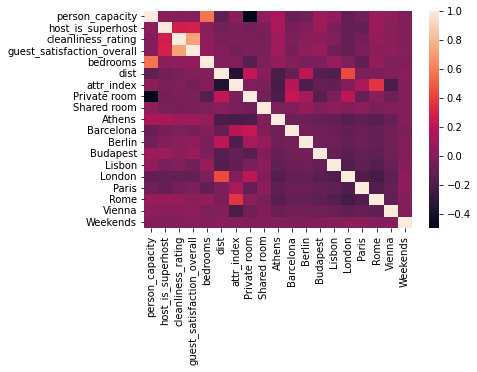

In [91]:
sns.heatmap(X_new.corr(numeric_only=True))
plt.show()

In [83]:
from sklearn.feature_selection import SequentialFeatureSelector
#Selecting the Best important features according to Logistic Regression
sfs_selector = SequentialFeatureSelector(estimator=LinearRegression(), direction='backward', scoring='r2', cv=10)
sfs_selector.fit(X_train,y_train)
X_train.columns[sfs_selector.get_support()]


/Users/lauraforerocamacho/Library/Python/3.8/lib/python/site-packages/sklearn/feature_selection/_sequential.py:206: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


SequentialFeatureSelector(cv=10, direction='backward',
                          estimator=LinearRegression(), scoring='r2')

Index(['bedrooms', 'attr_index', 'Private room', 'Athens', 'Barcelona',
       'Berlin', 'Budapest', 'Lisbon', 'Rome', 'Vienna'],
      dtype='object')

In [117]:
X.columns

Index(['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
       'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
       'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm',
       'rest_index', 'rest_index_norm', 'Private room', 'Shared room',
       'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon', 'London',
       'Paris', 'Rome', 'Vienna', 'Weekends'],
      dtype='object')

In [107]:
new_columns=['person_capacity', 'multi', 'biz', 'guest_satisfaction_overall',
       'bedrooms', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'Private room', 'Shared room', 'Athens', 'Barcelona', 'Berlin',
       'Budapest', 'Lisbon', 'London', 'Paris', 'Rome', 'Vienna']
X_new= X[new_columns]

In [84]:
new_columns=['bedrooms', 'attr_index', 'Private room', 'Athens', 'Barcelona',
       'Berlin', 'Budapest', 'Lisbon', 'Rome', 'Vienna']
X_new= X[new_columns]


In [105]:

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.30, random_state=42,
                                                    stratify=X_new[[ 
       'Private room', 'Athens', 'Barcelona',
       'Berlin', 'Budapest', 'Lisbon', 'Rome', 'Vienna']])

In [106]:
len(X_new.columns)

19

In [70]:
X_new.columns

Index(['person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'attr_index', 'Private room', 'Shared room', 'Athens', 'Barcelona',
       'Berlin', 'Budapest', 'Lisbon', 'London', 'Paris', 'Rome', 'Vienna',
       'Weekends'],
      dtype='object')

In [110]:

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.30, random_state=42,
                                                    stratify=X_new[[ 
        'Private room', 'Shared room', 'Athens', 'Barcelona',
       'Berlin', 'Budapest', 'Lisbon', 'London', 'Paris', 'Rome', 'Vienna',
       'Weekends']])

<AxesSubplot:>

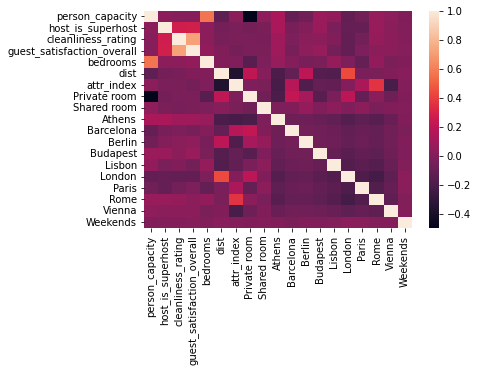

In [94]:
sns.heatmap(X_train.corr(numeric_only=True))
plt.show()

In [111]:
from sklearn import linear_model

lr_one_hot = linear_model.LinearRegression()
lr_one_hot.fit(X_train,y_train)

r2_lr_one_hot_train = lr_one_hot.score(X_train,y_train)
r2_lr_one_hot_cv = np.mean(cross_val_score(lr_one_hot, X_train,y_train, cv=10, scoring='r2'))

print('Train R2 score: {}\nCross-Validation R2 score: {}'.format(r2_lr_one_hot_train, r2_lr_one_hot_cv))

LinearRegression()

Train R2 score: 0.32614374887257525
Cross-Validation R2 score: 0.3639149982823195
